## *This project classifies the images on the fact that whether they are captured during day light or at night or in dim light*

    - Images are taken from the internet
    - Total 1700+ images are there, with 759 for day and rest for night.
    - Image quantity and quality both are not at par for a deep neural network to be trained.
    - This model can be tuned for better and accurate result with Keras tuner, Talos etc to optimize the hyperparameter             -- (currently machine limitation).
    - Model accuracy can also be refined with more and better dataset.
    - Computer Vision aapproach to determine the same using the BGR to HSV values and then finding a threshold to classify 
    -- can also be used, but it can be difficult to attain a greater accuracy for images with noise like cloudy time in day 
    --- or fog scenes.
    - To refine model with more robustness to noise, we can augment the data and also add random noise in image pixels.
    - Challenge : Need to label the data for training, if the data is humongous.
    

## Note : Please find the label below (The same is followed through out the notebook)

 >> 0 : Day 
 
 >> 1 : Night

In [1]:
#Importing all the libraries
import keras
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from imutils import paths
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Training the model

In [2]:
# Initialize to create the dataset
image_names = []
classes = []
train_df = pd.DataFrame()

In [3]:
#Paths
day_images = r"S:\\Day_night_image_classification\\Image\\Day\\"
night_images = r"S:\\Day_night_image_classification\\Image\\Night\\"
complete_images = r"S:\\Day_night_image_classification\\Image\\Combined\\"

In [4]:
#Training Data Acquisition
""" 0 for day and 1 for night """
for imagePath in paths.list_images(day_images):
    image_names.append(imagePath.split('\\')[-1])
    classes.append(0)
for imagePath in paths.list_images(night_images):
    image_names.append(imagePath.split('\\')[-1])
    classes.append(1)

In [5]:
train_df['image_names'] = image_names
train_df['classes'] = classes

In [6]:
#Converting image data into array
train_image = []
for i in tqdm(range(int((train_df.shape[0])))):
    img = image.load_img(complete_images+str(train_df['image_names'][i]),target_size=(300,300))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████████████████████████████████████████████████████████████████████████| 1722/1722 [00:32<00:00, 70.31it/s]


In [7]:
#visualizing the feature array dimensions
X.shape

(1722, 300, 300, 3)

In [8]:
#Creating label array
y = np.array(train_df.drop(['image_names'],axis=1))
y.shape

(1722, 1)

In [9]:
#Splitting data in test and train for model validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [10]:
#constructing model architecture
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(4, 4), activation="relu", input_shape=(300,300,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(4, 4), activation="relu"))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [11]:
#compiling the model
model.compile(optimizer='Adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
#Training the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=64,verbose=1,shuffle=False)

Train on 1205 samples, validate on 517 samples
Epoch 1/20
1205/1205 [==============================] - ETA: 2:10:20 - loss: 0.7464 - acc: 0.42 - ETA: 1:01:43 - loss: 1.9510 - acc: 0.49 - ETA: 38:50 - loss: 1.6498 - acc: 0.5208 - ETA: 27:23 - loss: 1.4612 - acc: 0.54 - ETA: 20:29 - loss: 1.3241 - acc: 0.55 - ETA: 15:53 - loss: 1.2116 - acc: 0.56 - ETA: 12:36 - loss: 1.1395 - acc: 0.58 - ETA: 10:07 - loss: 1.1005 - acc: 0.58 - ETA: 8:11 - loss: 1.0505 - acc: 0.5868 - ETA: 6:38 - loss: 1.0145 - acc: 0.584 - ETA: 5:22 - loss: 0.9788 - acc: 0.596 - ETA: 4:18 - loss: 0.9617 - acc: 0.597 - ETA: 3:24 - loss: 0.9348 - acc: 0.601 - ETA: 2:37 - loss: 0.9096 - acc: 0.604 - ETA: 1:57 - loss: 0.8898 - acc: 0.606 - ETA: 1:21 - loss: 0.8664 - acc: 0.613 - ETA: 49s - loss: 0.8498 - acc: 0.616 - ETA: 21s - loss: 0.8340 - acc: 0.62 - 471s 391ms/step - loss: 0.8207 - acc: 0.6266 - val_loss: 0.5358 - val_acc: 0.7408
Epoch 2/20
1205/1205 [==============================] - ETA: 21s - loss: 0.5308 - acc: 0.79

1205/1205 [==============================] - ETA: 45s - loss: 0.1582 - acc: 0.95 - ETA: 48s - loss: 0.1511 - acc: 0.94 - ETA: 37s - loss: 0.1449 - acc: 0.94 - ETA: 31s - loss: 0.1650 - acc: 0.94 - ETA: 27s - loss: 0.1464 - acc: 0.95 - ETA: 23s - loss: 0.1318 - acc: 0.96 - ETA: 21s - loss: 0.1273 - acc: 0.96 - ETA: 18s - loss: 0.1154 - acc: 0.96 - ETA: 16s - loss: 0.1047 - acc: 0.97 - ETA: 14s - loss: 0.0966 - acc: 0.97 - ETA: 13s - loss: 0.0947 - acc: 0.97 - ETA: 12s - loss: 0.1101 - acc: 0.97 - ETA: 10s - loss: 0.1036 - acc: 0.97 - ETA: 9s - loss: 0.1080 - acc: 0.9732 - ETA: 7s - loss: 0.1158 - acc: 0.971 - ETA: 5s - loss: 0.1118 - acc: 0.972 - ETA: 3s - loss: 0.1085 - acc: 0.973 - ETA: 1s - loss: 0.1058 - acc: 0.974 - 43s 36ms/step - loss: 0.1045 - acc: 0.9734 - val_loss: 0.0469 - val_acc: 0.9923
Epoch 11/20
1205/1205 [==============================] - ETA: 23s - loss: 0.0352 - acc: 1.00 - ETA: 21s - loss: 0.0401 - acc: 1.00 - ETA: 20s - loss: 0.0459 - acc: 0.98 - ETA: 19s - loss: 0.

Epoch 20/20
1205/1205 [==============================] - ETA: 23s - loss: 0.0102 - acc: 1.00 - ETA: 22s - loss: 0.0137 - acc: 1.00 - ETA: 20s - loss: 0.0117 - acc: 1.00 - ETA: 19s - loss: 0.0096 - acc: 1.00 - ETA: 18s - loss: 0.0113 - acc: 0.99 - ETA: 16s - loss: 0.0123 - acc: 0.99 - ETA: 15s - loss: 0.0151 - acc: 0.99 - ETA: 14s - loss: 0.0145 - acc: 0.99 - ETA: 12s - loss: 0.0130 - acc: 0.99 - ETA: 11s - loss: 0.0133 - acc: 0.99 - ETA: 10s - loss: 0.0139 - acc: 0.99 - ETA: 9s - loss: 0.0348 - acc: 0.9922 - ETA: 8s - loss: 0.0325 - acc: 0.992 - ETA: 7s - loss: 0.0306 - acc: 0.993 - ETA: 6s - loss: 0.0325 - acc: 0.992 - ETA: 4s - loss: 0.0326 - acc: 0.992 - ETA: 3s - loss: 0.0320 - acc: 0.992 - ETA: 1s - loss: 0.0316 - acc: 0.992 - 38s 31ms/step - loss: 0.0309 - acc: 0.9925 - val_loss: 0.0438 - val_acc: 0.9865


In [13]:
#Evaluating the model on train data
scores = model.evaluate(X_train, y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 99.25%


In [14]:
#Evaluating the model on validation data
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 98.65%


# Testing the Model

I have prepared the test data to check the accuracy. The name and target values are stored in a dataframe.

In [38]:
# Reading the test data
test_images = r"C:\\Users\\hp\\Downloads\\images_upright\\query\\night\\milestone\\Renamed\\"
test_df = pd.read_csv('C:\\Users\\hp\\Downloads\\images_upright\\query\\night\\milestone\\test_csv.csv')

In [44]:
#Converting image data into array
test_image = []
for i in tqdm(range(int((test_df.shape[0])))):
    img = image.load_img(test_images+str(test_df['image_names'][i]),target_size=(300,300))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
X = np.array(test_image)

100%|████████████████████████████████████████████████████████████████████████████████| 472/472 [00:21<00:00, 21.92it/s]


In [45]:
#Predicting the model for day and night
proba = model.predict(X)
y_classes = proba.argmax(axis=-1)

In [46]:
#Appending the predicted classes to the test dataframe
test_df ['predicted'] = y_classes

In [47]:
#Checking the values in df
test_df

,image_names,target,predicted
0,10.jpg,1,1
1,100.jpg,1,1
2,101.jpg,0,0
3,102.jpg,1,1
4,103.jpg,0,0
5,104.jpg,1,1
6,105.jpg,0,1
7,106.jpg,1,1
8,107.jpg,0,0
9,108.jpg,1,1


In [79]:
#Checking model performance with different metrics
print("%s: %.2f%%" % ("Accuracy: ",accuracy_score(test_df['target'], y_classes)*100))
print("%s: %.2f%%" % ("F1 Score: ",f1_score(test_df['target'], y_classes, average="macro")*100))
print("%s: %.2f%%" % ("Precision Score: ",precision_score(test_df['target'], y_classes, average="macro")*100))
print("%s: %.2f%%" % ("Recall Score: ",recall_score(test_df['target'], y_classes, average="macro")*100))

Accuracy: : 75.42%
F1 Score: : 73.41%
Precision Score: : 74.67%
Recall Score: : 83.84%


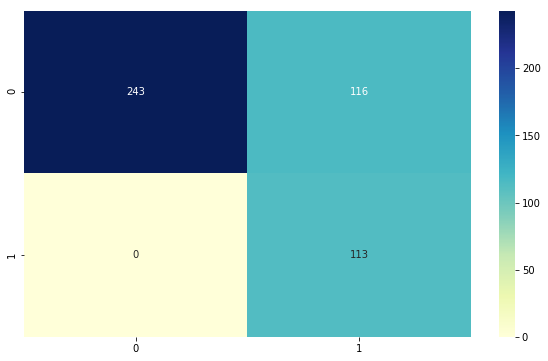

In [70]:
#Plotting the confusion matrix for better understanding
cm =confusion_matrix(test_df['target'], y_classes)  
index = [0,1]  
columns = [0,1]  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df,annot=True,cmap="YlGnBu",fmt='g')

In [81]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
